In [57]:
import pandas as pd
from pathlib import Path

In [58]:
root_dir = Path.cwd().parent
filename = root_dir / "network_usage_aws_large.csv"
time_column = "t_parsed"
network_usage_column = "cumulative_parsed"
# hostname = "L02197.DIRECTORY.INTRA"
# hostname = "s3-r-w.eu-central-1.amazonaws.com"
hostnames = ["s3-w.eu-central-1.amazonaws.com", "s3-r-w.eu-central-1.amazonaws.com"]

In [59]:
df = pd.read_csv(filename)
df

,Unnamed: 0,#,host/name,direction,2s,10s,40s,cumulative,t,cumulative_parsed,t_parsed
0,0,1.0,172.30.74.51,=>,167Kb,167Kb,167Kb,41.7KB,2023-11-24-16-08-59,41700,2023-11-24 16:08:59
1,1,NaN,3.5.135.4,<=,22.7Mb,22.7Mb,22.7Mb,5.66MB,2023-11-24-16-08-59,5660000,2023-11-24 16:08:59
2,2,2.0,172.30.74.51,=>,1.32Kb,1.32Kb,1.32Kb,337B,2023-11-24-16-08-59,337,2023-11-24 16:08:59
3,3,NaN,172.30.64.1,<=,1.11Kb,1.11Kb,1.11Kb,284B,2023-11-24-16-08-59,284,2023-11-24 16:08:59
4,4,3.0,224.0.0.251,=>,0b,0b,0b,0B,2023-11-24-16-08-59,0,2023-11-24 16:08:59
...,...,...,...,...,...,...,...,...,...,...,...
2583,2583,NaN,s3-r-w.eu-central-1.amazonaws.com,<=,19.2Mb,19.2Mb,19.2Mb,4.80MB,2023-11-24-16-08-09,4800000,2023-11-24 16:08:09
2584,2584,2.0,172.30.74.51,=>,956b,956b,956b,239B,2023-11-24-16-08-09,239,2023-11-24 16:08:09
2585,2585,NaN,l03236.mshome.net,<=,576b,576b,576b,144B,2023-11-24-16-08-09,144,2023-11-24 16:08:09
2586,2586,3.0,mdns.mcast.net,=>,0b,0b,0b,0B,2023-11-24-16-08-09,0,2023-11-24 16:08:09


In [60]:
import numpy as np
np.unique(df["host/name"])

array(['13.107.13.93', '172.30.64.1', '172.30.74.51', '172.30.79.255',
       '224.0.0.251', '239.255.255.250', '255.255.255.255', '3.5.134.125',
       '3.5.135.4', '3.5.136.11', '3.5.138.175', '52.219.140.113',
       '52.219.140.122', '52.219.140.129', '52.219.140.25',
       '52.219.140.50', '52.219.169.107', '52.219.169.11',
       '52.219.169.147', '52.219.169.203', '52.219.169.223',
       '52.219.169.254', '52.219.170.111', '52.219.170.123',
       '52.219.170.127', '52.219.170.138', '52.219.170.147',
       '52.219.170.151', '52.219.170.159', '52.219.170.19',
       '52.219.170.219', '52.219.170.51', '52.219.171.118',
       '52.219.171.119', '52.219.171.131', '52.219.171.155',
       '52.219.171.159', '52.219.171.246', '52.219.171.54',
       '52.219.171.59', '52.219.208.31', '52.219.46.89', '52.219.47.226',
       '52.219.72.177', '52.219.72.185', '52.219.72.73', '52.219.75.125',
       'l03236.mshome.net', 'mdns.mcast.net',
       's3-r-w.eu-central-1.amazonaws.com',
      

In [61]:
df = pd.read_csv(filename)
df[time_column] = pd.to_datetime(df[time_column])
df = df.loc[df["direction"] == "<="]
df = df.loc[(df["host/name"] == hostnames[0]) | (df["host/name"] == hostnames[1])]
df

,Unnamed: 0,#,host/name,direction,2s,10s,40s,cumulative,t,cumulative_parsed,t_parsed
7,7,NaN,s3-r-w.eu-central-1.amazonaws.com,<=,29.9Mb,29.9Mb,29.9Mb,7.47MB,2023-11-24-16-18-43,7470000,2023-11-24 16:18:43
13,13,NaN,s3-r-w.eu-central-1.amazonaws.com,<=,21.4Mb,21.4Mb,21.4Mb,5.36MB,2023-11-24-16-18-52,5360000,2023-11-24 16:18:52
19,19,NaN,s3-r-w.eu-central-1.amazonaws.com,<=,9.95Mb,9.95Mb,9.95Mb,2.49MB,2023-11-24-16-17-34,2490000,2023-11-24 16:17:34
27,27,NaN,s3-r-w.eu-central-1.amazonaws.com,<=,25.4Mb,25.4Mb,25.4Mb,6.35MB,2023-11-24-16-16-42,6350000,2023-11-24 16:16:42
33,33,NaN,s3-w.eu-central-1.amazonaws.com,<=,7.84Mb,7.84Mb,7.84Mb,1.96MB,2023-11-24-16-20-26,1960000,2023-11-24 16:20:26
...,...,...,...,...,...,...,...,...,...,...,...
2543,2543,NaN,s3-r-w.eu-central-1.amazonaws.com,<=,37.1Mb,37.1Mb,37.1Mb,9.27MB,2023-11-24-16-11-38,9270000,2023-11-24 16:11:38
2549,2549,NaN,s3-r-w.eu-central-1.amazonaws.com,<=,32.8Mb,32.8Mb,32.8Mb,8.19MB,2023-11-24-16-09-59,8189999,2023-11-24 16:09:59
2563,2563,NaN,s3-w.eu-central-1.amazonaws.com,<=,3.63Mb,3.63Mb,3.63Mb,930KB,2023-11-24-16-06-44,930000,2023-11-24 16:06:44
2577,2577,NaN,s3-r-w.eu-central-1.amazonaws.com,<=,25.6Mb,25.6Mb,25.6Mb,6.41MB,2023-11-24-16-13-41,6410000,2023-11-24 16:13:41


In [62]:
df = df.groupby(['t_parsed']).agg({'cumulative_parsed': 'sum'})
df['cumulative_parsed'] = df['cumulative_parsed'] / 1e6  # to MB
df

,cumulative_parsed
t_parsed,
2023-11-24 16:06:42,1.070000
2023-11-24 16:06:44,0.930000
2023-11-24 16:06:48,6.500000
2023-11-24 16:06:50,2.960000
2023-11-24 16:06:53,9.440000
...,...
2023-11-24 16:21:42,11.610000
2023-11-24 16:21:44,9.448000
2023-11-24 16:21:48,5.460000


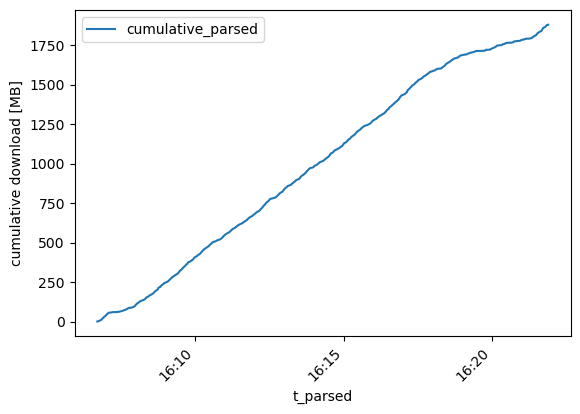

In [63]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots()

df.cumsum().reset_index().plot(x=time_column, y=network_usage_column, ax=ax)
dateformat = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(dateformat)
ax.set_ylabel("cumulative download [MB]")
fig.autofmt_xdate(rotation=45)

In [64]:
fig.savefig("aws_large.png")